<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/Copy_of_STP_AIML_Module_6_Lab_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Neural Network



![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*aWIO7eB6E4-cIkK9.gif)



## Building a Nueral Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random

In [2]:
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]
num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

In [3]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)
w = [0.2, 0.6]
b = -0.3
X, y = data, labels
pred_y = [weighted_sum(x, w, b) for x in X]
print("for x=[%0.2f, %0.2f], predicted = %0.2f, actual = %0.2f" % (X[0][0], X[0][1], pred_y[0], y[0]))

for x=[4.70, 3.20], predicted = 2.56, actual = 1.60


We can evaluate the quality of our predictions using cost/loss functions. Lets use the sum-squared error function



In [4]:
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)
error = cost_function(pred_y, y)
print(error)

313.50559999999996


In [5]:
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)
w, b = [random.random(), random.random()], random.random()
def F(X, w, b):
    return np.sum(w*X, axis=1) + b
y_pred = F(X, w, b)
init_cost = cost_function(y_pred, y)
print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

initial parameters: w1=0.138, w2=0.818, b=0.370
initial cost = 24.623


In [6]:
def dJdw1(X, y, w, b):
    return -np.dot(X[:,0], y - F(X, w, b))
def dJdw2(X, y, w, b):
    return -np.dot(X[:,1], y - F(X, w, b))
def dJdb(X, y, w, b):
    return -np.sum(y - F(X, w, b))

In [7]:
lr = 0.001
n_iters = 2000
errors = []
for i in range(n_iters):
    w[0] = w[0] - lr * dJdw1(X, y, w, b)
    w[1] = w[1] - lr * dJdw2(X, y, w, b)
    b = b - lr * dJdb(X, y, w, b)
    y_pred = F(X, w, b)
    j = cost_function(y_pred, y)
    errors.append(j)

Text(0.5, 0, 'iterations')

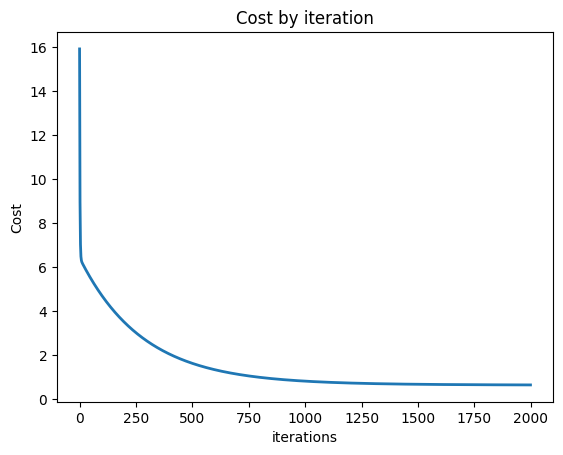

In [8]:
plt.plot(range(n_iters), errors, linewidth=2)
plt.title("Cost by iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

Let's implement the sigmoid function.



In [9]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [10]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# our parameters
w = [0.2, 0.6]
b = -0.3

X, y = data, labels

# get weighted sum like before
Z = [weighted_sum(x, w, b) for x in X]

# now transform the weighted sums with a sigmoid
y_pred = [sigmoid(z) for z in Z]

# evaluate error
error = cost_function(y_pred, y)
print(error)

829.3581552057614


In [ ]:
W1 = np.random.randn(2, 3)
W2 = np.random.randn(3, 1)

print("W1=", W1)
print("W2=", W2)

W1= [[ 0.67291254  0.46302009 -0.66293242]
 [-0.8183928  -2.44116241  0.35065326]]
W2= [[-0.31448717]
 [ 0.6995732 ]
 [ 1.3111543 ]]


#### implementing a forward pass

In [13]:
X, y = data, labels
W1 = np.random.randn(2, 3)
W2 = np.random.randn(3, 1)
y = y.reshape((len(labels), 1))
z = np.dot(X, W1)
z = sigmoid(z)
y_pred = np.dot(z, W2)
error = cost_function(y_pred, y)
print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(y_pred[0][0], y[0][0], error))

predicted -0.61 for example 0, actual 1.60, total cost 1576.82


Let's turn the above operations into a class.



In [14]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y


In [15]:
# instantiate a neural network with 2 input neurons, 3 hidden neurons, and 1 output neuron using above class

net = Neural_Network(2, 3, 1)

Now to do a forward pass, we can simply run the networks predict function:


In [16]:
X, y = data, labels
y_pred = net.predict(X)
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 2.56 for example 0, actual 1.60, total cost 192457.99


 we have a 2x3x1 neural network with 9 weights and 4 biases for 13 total parameters.

 Now we optimize the parameters to minimize our cost function using Gradient Descent.

Gradient Descent will find the gradient of the cost/loss function(J)
 with respect to the parameters w,b.

 $$
 w_i := w_i - \alpha \cdot \frac{\partial J}{\partial w_i}
 $$

In [17]:
def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

The above function 'get_gradient' calculates the gradient of a 2-layer network net, for our dataset X, y

Now we train the network by the following steps:

1. Load our dataset
2. Instantiate a neural network
3. Train it on the data using the gradient method made above.

In [18]:
# load the data and labels
X, y = data, labels.reshape((len(labels),1))

# it's always a good idea to normalize the data between 0 and 1
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# create a 2x3x1 neural net
net = Neural_Network(2, 3, 1)

# what is the current cost?
y_orig = net.predict(X)
init_cost = cost_function(y_orig, y)
print("initial cost = %0.3f" % init_cost)

# Set the learning rate, and how many epochs (updates) to try
n_epochs = 2000
learning_rate = 0.01

# for each epoch, calculate the gradient, then subtract it from the parameters, and save the cost
errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost_function(y_pred, y)
    errors.append(error)


initial cost = 252.618


Text(0, 0.5, 'Error')

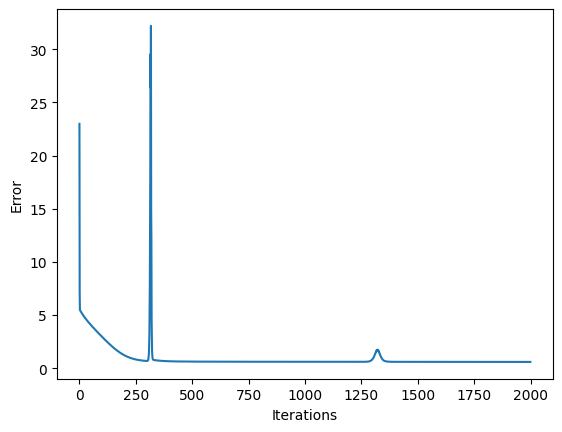

In [19]:
# plotting iterations vs error
plt.plot(range(0, len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')

Let us see the implementation and behavior of Tanh and ReLU activation functions.


In [20]:
def tanh(z):
    return np.tanh(z)

In [21]:
def relu(x):
    return np.maximum(0, x)

Let us generate an array of evenly spaced numbers and then create a plot to visualize the `sigmoid`, `tanh`, and `relu` functions.



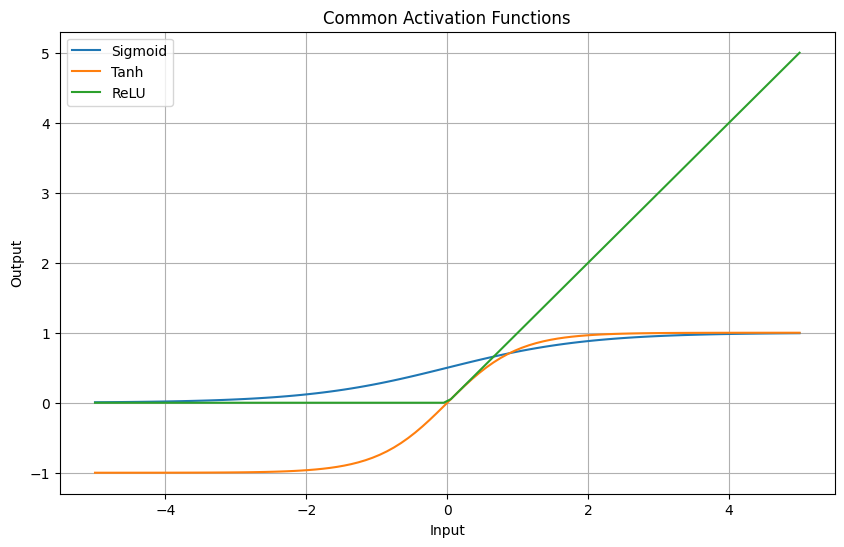

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(x):
    return np.maximum(0, x)

x_vals = np.linspace(-5, 5, 100)

plt.figure(figsize=(10, 6))

plt.plot(x_vals, sigmoid(x_vals), label='Sigmoid')
plt.plot(x_vals, tanh(x_vals), label='Tanh')
plt.plot(x_vals, relu(x_vals), label='ReLU')

plt.title('Common Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def mean_absolute_error(y_pred, y_actual):
    return np.sum(np.abs(y_actual - y_pred)) / len(y_actual)

In [24]:
def hinge_loss(y_pred, y_actual):
    return np.mean(np.maximum(0, 1 - y_actual * y_pred))

Now let us calculate and print the Mean Absolute Error (MAE) using the `y_pred` and `y` values obtained from the latest neural network prediction. This demonstrates the practical application of the MAE loss function.



In [25]:
import numpy as np
from sklearn.datasets import load_iris

# Load and shuffle the dataset
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)  # size of our dataset

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

# Now data and labels are defined. Assign to X, y for consistent variable names.
X, y = data, labels.reshape((len(labels),1))

# it's always a good idea to normalize the data between 0 and 1
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# Define the sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define the Neural_Network class
class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y

def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

# create a 2x3x1 neural net
net = Neural_Network(2, 3, 1)

# what is the current cost?
y_orig = net.predict(X)
init_cost = cost_function(y_orig, y)

# Define get_gradient
def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

# Set the learning rate, and how many epochs (updates) to try
n_epochs = 2000
learning_rate = 0.01

# for each epoch, calculate the gradient, then subtract it from the parameters, and save the cost
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)

# Define mean_absolute_error (assuming it's defined elsewhere or explicitly here if needed)
def mean_absolute_error(y_pred, y_actual):
    return np.sum(np.abs(y_actual - y_pred)) / len(y_actual)

# Now y_pred and y are defined for the final calculation
mae_error = mean_absolute_error(y_pred, y)
print("Mean Absolute Error: %0.3f" % mae_error)

Mean Absolute Error: 0.074


Now let us create a small example dataset with binary `y_actual` values (1 or -1) and corresponding `y_pred` values, then calculate and print the Hinge Loss using the previously defined `hinge_loss` function. This will demonstrate the application of Hinge Loss, which is typically used for binary classification.



In [26]:
y_actual_hinge = np.array([1, 1, -1, -1, 1, -1])
y_pred_hinge = np.array([0.8, 0.2, -0.6, 0.1, 0.9, -0.9])

hinge_l = hinge_loss(y_pred_hinge, y_actual_hinge)
print("Hinge Loss (example): %0.3f" % hinge_l)

Hinge Loss (example): 0.450


#### More on Sigmoid function:

*   **Use Cases**: Historically popular for output layers in binary classification problems where the output needs to be interpreted as a probability (between 0 and 1).
*   **Advantages**: Smooth gradient, produces a clear probability interpretation.
*   **Drawbacks**:
    *   **Vanishing Gradient Problem**: For very large positive or negative inputs, the sigmoid function saturates, meaning its derivative becomes very close to zero. This can cause the gradients to become extremely small during backpropagation, effectively stopping the learning process for layers closer to the input.
    *   **Outputs Not Zero-Centered**: The output of the sigmoid function is always positive (between 0 and 1). This can lead to a 'zig-zagging' effect in gradient descent updates for the weights, making optimization less efficient.

#### More on Tanh function:

*   **Use Cases**: Commonly used in hidden layers of neural networks, especially when the output needs to be centered around zero. It's an alternative to sigmoid that often performs better.
*   **Advantages**:
    *   **Zero-Centered Output**: Unlike sigmoid, Tanh's output ranges from -1 to 1, which helps in centering the data and often makes the training of the next layer easier and more efficient.
    *   **Stronger Gradients**: The gradients are typically steeper than sigmoid, leading to faster learning in some cases.
*   **Drawbacks**:
    *   **Vanishing Gradient Problem**: Similar to sigmoid, Tanh also suffers from the vanishing gradient problem when inputs are very large or very small, as its derivative approaches zero in these regions.

#### More on ReLU function:

*   **Use Cases**: Currently the most popular activation function for hidden layers in deep neural networks. It avoids the vanishing gradient problem for positive inputs.
*   **Advantages**:
    *   **Solves Vanishing Gradient Problem (for positive inputs)**: For positive inputs, the derivative is always 1, which prevents the gradient from vanishing. This allows for faster training of deep networks.
    *   **Computational Efficiency**: ReLU involves simple operations (max(0, x)), making it computationally very efficient compared to sigmoid and Tanh, which involve exponentials.
    *   **Sparsity**: It can lead to sparse activations, meaning some neurons output 0, which can be beneficial for certain tasks.
*   **Drawbacks**:
    *   **Dying ReLU Problem**: For negative inputs, the derivative is 0. This means that once a neuron's output becomes negative, it can stop learning completely, as its gradient will always be zero. This is known as the 'dying ReLU' problem.
    *   **Not Zero-Centered**: Like sigmoid, ReLU's output is not zero-centered, which can also lead to zig-zagging gradient updates.


#### More on Mean Squared Error (MSE) / Sum Squared Error (SSE):

*   **Formula**: $$\sum_{i=1}^{D}(x_i-y_i)^2$$ or $$\frac{1}{D}\sum_{i=1}^{D}(x_i-y_i)^2$$
*   **Use Cases**: Primarily used in **regression problems** where the goal is to predict a continuous value. It penalizes larger errors more heavily due to the squaring operation.
*   **Characteristics**:
    *   **Sensitivity to Outliers**: Squaring the errors means that larger errors contribute disproportionately more to the total loss, making MSE sensitive to outliers.
    *   **Smooth and Differentiable**: The MSE function is convex, smooth, and differentiable everywhere, which makes it well-suited for gradient-based optimization methods.
    *   **Interpretation**: Represents the average of the squared differences between predicted and actual values. The unit of MSE is the square of the unit of the target variable.

#### More on Mean Absolute Error (MAE):

*   **Formula**: $$\sum_{i=1}^{D}|x_i-y_i|$$ or $$\frac{1}{D}\sum_{i=1}^{D}|x_i-y_i|$$
*   **Use Cases**: Used in **regression problems**, especially when the presence of outliers is a concern. It measures the average magnitude of the errors without considering their direction.
*   **Characteristics**:
    *   **Robustness to Outliers**: Unlike MSE, MAE is less sensitive to outliers because it uses the absolute difference instead of squaring the error. A large error from an outlier doesn't disproportionately affect the total loss.
    *   **Linear Penalty**: It provides a linear penalty for errors, meaning the magnitude of the error directly corresponds to the penalty. This can sometimes make it harder to optimize due to its non-differentiability at zero (though in practice, subgradients are used).
    *   **Interpretation**: Represents the average absolute difference between predicted and actual values. The unit of MAE is the same as the unit of the target variable, making it more interpretable than MSE.

## Exercises

To improve your understanding of neural networks, try the following exercises:

1.  **Experiment with Activation Functions**: Modify the `Neural_Network` class to allow for different activation functions (e.g., Tanh or ReLU) in the hidden layer. Compare the training convergence and final error with Sigmoid by plotting their respective error curves.
2.  **Implement a New Loss Function**: Integrate the `mean_absolute_error` function (or a new one like Binary Cross-Entropy) into the training loop of the `Neural_Network` class and compare its performance with the `cost_function` (Sum Squared Error).
3.  **Hyperparameter Tuning**: Experiment with different `learning_rate` and `n_epochs` values for the provided neural network. Plot the error curve for each experiment and analyze the impact on convergence speed and final error.
4.  **Add Bias to Hidden Layer**: Extend the `Neural_Network` class to include a bias term for the hidden layer's weighted sum. Retrain the network and observe any changes in performance or convergence.
5.  **Explore Advanced Activation Functions**: Research the 'Dying ReLU' problem. Explain what it is and suggest how an alternative activation function like Leaky ReLU or ELU might mitigate it.

# Task
Experiment with different activation functions (Sigmoid, Tanh, ReLU) for the hidden layer in the `Neural_Network` class, train the network with each, and plot their respective error curves to compare training convergence and final error. Additionally, implement Mean Absolute Error (MAE) as a loss function within the training loop, compare its performance to the Sum Squared Error (SSE), and investigate the impact of various `learning_rate` and `n_epochs` combinations. Extend the network to include a bias term in the hidden layer, observing any performance changes. Finally, research and explain the 'Dying ReLU' problem and how Leaky ReLU or ELU might address it, and summarize all findings.

## Experiment with Activation Functions

### Subtask:
Modify the `Neural_Network` class to use different activation functions (Sigmoid, Tanh, ReLU) in the hidden layer, train the network with each, and plot their respective error curves.


**Reasoning**:
The first step is to modify the `Neural_Network` class to accept an activation function as a parameter and use it in the `predict` method. I will also create a helper function `train_network` to encapsulate the training logic, which will be reused for different activation functions.



In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Re-define sigmoid, tanh, and relu (already present but good to ensure scope)
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(x):
    return np.maximum(0, x)

# Re-define cost function (needed in train_network)
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

# Define get_gradient (needed in train_network)
def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2


class Neural_Network(object):
    def __init__(self, n0, n1, n2, activation_fn=sigmoid):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        self.activation_fn = activation_fn

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = self.activation_fn(z) # Use the chosen activation function
        y = np.dot(z, self.W2)
        return y

def train_network(net, X, y, n_epochs, learning_rate):
    errors = []
    for i in range(n_epochs):
        dw1, dw2 = get_gradient(net, X, y)
        net.W1 = net.W1 - learning_rate * dw1
        net.W2 = net.W2 - learning_rate * dw2
        y_pred = net.predict(X)
        error = cost_function(y_pred, y)
        errors.append(error)
    return errors

print("Modified Neural_Network class and train_network function defined.")

Modified Neural_Network class and train_network function defined.


**Reasoning**:
Now that the `Neural_Network` class and `train_network` function are defined, I will prepare the data, initialize three network instances with different activation functions, train each of them using the `train_network` helper, and then plot their error curves to compare performance.



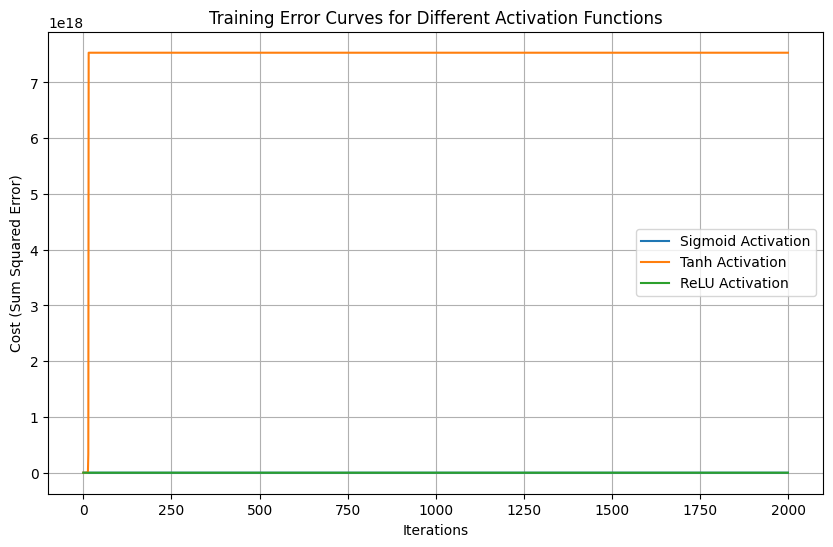

Training complete for Sigmoid, Tanh, and ReLU activation functions. Error curves plotted.


In [28]:
from sklearn.datasets import load_iris

# Load and normalize the data as done previously in the notebook
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

X, y = data, labels.reshape((len(labels),1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# Hyperparameters for training
n_epochs = 2000
learning_rate = 0.01

# Initialize and train network with Sigmoid activation
net_sigmoid = Neural_Network(2, 3, 1, activation_fn=sigmoid)
errors_sigmoid = train_network(net_sigmoid, X, y, n_epochs, learning_rate)

# Initialize and train network with Tanh activation
net_tanh = Neural_Network(2, 3, 1, activation_fn=tanh)
errors_tanh = train_network(net_tanh, X, y, n_epochs, learning_rate)

# Initialize and train network with ReLU activation
net_relu = Neural_Network(2, 3, 1, activation_fn=relu)
errors_relu = train_network(net_relu, X, y, n_epochs, learning_rate)

# Plotting the error curves
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), errors_sigmoid, label='Sigmoid Activation')
plt.plot(range(n_epochs), errors_tanh, label='Tanh Activation')
plt.plot(range(n_epochs), errors_relu, label='ReLU Activation')

plt.title('Training Error Curves for Different Activation Functions')
plt.xlabel('Iterations')
plt.ylabel('Cost (Sum Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

print("Training complete for Sigmoid, Tanh, and ReLU activation functions. Error curves plotted.")

## Implement Mean Absolute Error

### Subtask:
Integrate the `mean_absolute_error` function into the training loop of the `Neural_Network` class and compare its performance with the original `cost_function` (Sum Squared Error).


**Reasoning**:
I need to rename the existing `cost_function` to `sum_squared_error` and ensure `mean_absolute_error` is available. Then, I will modify both `get_gradient` and `train_network` functions to accept a `loss_fn` parameter, allowing for dynamic selection of the loss function during training. Finally, I will train two neural networks, one with `sum_squared_error` and another with `mean_absolute_error`, and plot their respective error curves for comparison.



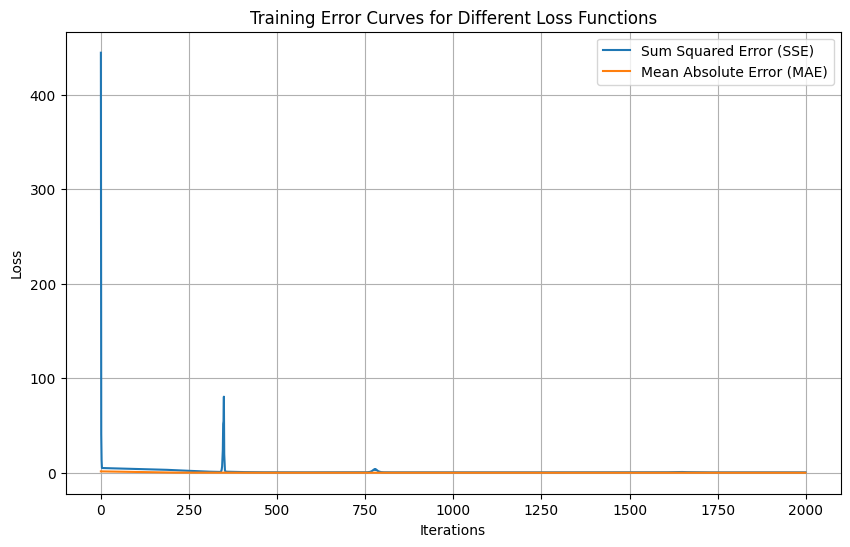

Training complete for both SSE and MAE loss functions. Error curves plotted.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# --- 1. Rename existing cost_function to sum_squared_error ---
def sum_squared_error(y_pred, y_actual):
    return 0.5 * np.sum((y_actual - y_pred)**2)

# --- 2. Ensure mean_absolute_error function is defined and available ---
def mean_absolute_error(y_pred, y_actual):
    return np.sum(np.abs(y_actual - y_pred)) / len(y_actual)

# Activation functions (re-defined for clarity, though already in kernel)
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(x):
    return np.maximum(0, x)

# Neural_Network class from previous step (with activation_fn parameter)
class Neural_Network(object):
    def __init__(self, n0, n1, n2, activation_fn=sigmoid):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        self.activation_fn = activation_fn

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = self.activation_fn(z) # Use the chosen activation function
        y = np.dot(z, self.W2)
        return y

# --- 3. Modify get_gradient to accept a loss_fn parameter ---
def get_gradient(net, X, y, loss_fn):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = loss_fn(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y) # Use the chosen loss function
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y) # Use the chosen loss function
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

# --- 4. Modify train_network to accept a loss_fn parameter ---
def train_network(net, X, y, n_epochs, learning_rate, loss_fn):
    errors = []
    for i in range(n_epochs):
        dw1, dw2 = get_gradient(net, X, y, loss_fn) # Pass loss_fn to get_gradient
        net.W1 = net.W1 - learning_rate * dw1
        net.W2 = net.W2 - learning_rate * dw2
        y_pred = net.predict(X)
        error = loss_fn(y_pred, y) # Use the chosen loss function for tracking
        errors.append(error)
    return errors

# Load and normalize the data
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

X, y = data, labels.reshape((len(labels),1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# Hyperparameters for training
n_epochs = 2000
learning_rate = 0.01

# --- 5. Train with sum_squared_error ---
net_sse = Neural_Network(2, 3, 1, activation_fn=sigmoid)
errors_sse = train_network(net_sse, X, y, n_epochs, learning_rate, sum_squared_error)

# --- 6. Train with mean_absolute_error ---
net_mae = Neural_Network(2, 3, 1, activation_fn=sigmoid)
errors_mae = train_network(net_mae, X, y, n_epochs, learning_rate, mean_absolute_error)

# --- 7. Plot both errors_sse and errors_mae ---
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), errors_sse, label='Sum Squared Error (SSE)')
plt.plot(range(n_epochs), errors_mae, label='Mean Absolute Error (MAE)')

plt.title('Training Error Curves for Different Loss Functions')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Training complete for both SSE and MAE loss functions. Error curves plotted.")

## Hyperparameter Tuning

### Subtask:
Experiment with different `learning_rate` and `n_epochs` values for the provided neural network. Plot the error curve for each experiment and analyze the impact on convergence speed and final error.


**Reasoning**:
I need to define various combinations of `learning_rate` and `n_epochs` to experiment with. Then, I will iterate through these combinations, re-initialize a neural network for each, train it using the `train_network` function, and store the resulting error curves. Finally, I will plot all the collected error curves to analyze the impact of different hyperparameters.



Training with learning_rate=0.001, n_epochs=500...
Training with learning_rate=0.001, n_epochs=2000...
Training with learning_rate=0.001, n_epochs=5000...
Training with learning_rate=0.01, n_epochs=500...
Training with learning_rate=0.01, n_epochs=2000...
Training with learning_rate=0.01, n_epochs=5000...
Training with learning_rate=0.1, n_epochs=500...
Training with learning_rate=0.1, n_epochs=2000...
Training with learning_rate=0.1, n_epochs=5000...


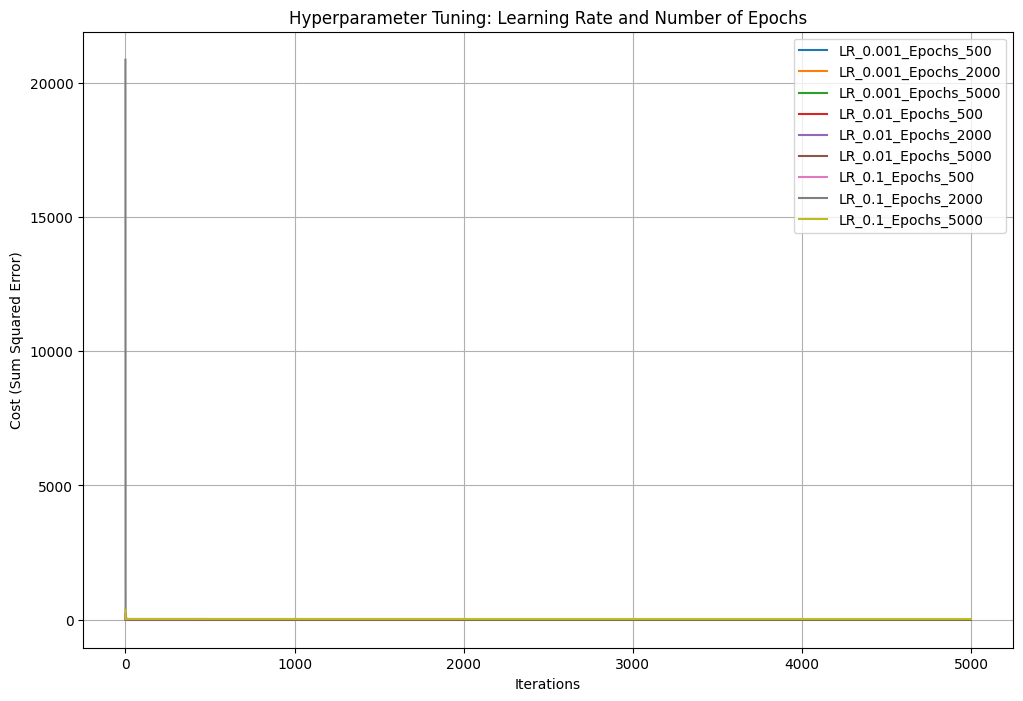

Hyperparameter tuning experiments complete and error curves plotted.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Re-define necessary functions and class if not already in scope in this specific run
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sum_squared_error(y_pred, y_actual):
    return 0.5 * np.sum((y_actual - y_pred)**2)

def get_gradient(net, X, y, loss_fn):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = loss_fn(y_pred_current, y)

    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2


class Neural_Network(object):
    def __init__(self, n0, n1, n2, activation_fn=sigmoid):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        self.activation_fn = activation_fn

        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = self.activation_fn(z)
        y = np.dot(z, self.W2)
        return y

def train_network(net, X, y, n_epochs, learning_rate, loss_fn):
    errors = []
    for i in range(n_epochs):
        dw1, dw2 = get_gradient(net, X, y, loss_fn)
        net.W1 = net.W1 - learning_rate * dw1
        net.W2 = net.W2 - learning_rate * dw2
        y_pred = net.predict(X)
        error = loss_fn(y_pred, y)
        errors.append(error)
    return errors

# Load and normalize the data
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

X, y = data, labels.reshape((len(labels),1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# 1. Define several combinations of learning_rate and n_epochs
learning_rates = [0.001, 0.01, 0.1]
n_epochs_values = [500, 2000, 5000]

# 2. Create an empty dictionary to store the error curves
experiment_results = {}

# 3. Iterate through each defined combination
for lr in learning_rates:
    for epochs in n_epochs_values:
        print(f"Training with learning_rate={lr}, n_epochs={epochs}...")
        # 4a. Instantiate a NEW Neural_Network object for each experiment
        # Use sigmoid as activation and sum_squared_error as loss
        net = Neural_Network(2, 3, 1, activation_fn=sigmoid)

        # 4b. Train the network
        errors = train_network(net, X, y, epochs, lr, sum_squared_error)

        # 4c. Store the returned error curve
        key = f'LR_{lr}_Epochs_{epochs}'
        experiment_results[key] = errors

# 5. Plot all the stored error curves
plt.figure(figsize=(12, 8))
for key, errors in experiment_results.items():
    plt.plot(range(len(errors)), errors, label=key)

# 6. Add title, labels, legend, and grid
plt.title('Hyperparameter Tuning: Learning Rate and Number of Epochs')
plt.xlabel('Iterations')
plt.ylabel('Cost (Sum Squared Error)')
plt.legend()
plt.grid(True)

# 7. Display the plot
plt.show()

print("Hyperparameter tuning experiments complete and error curves plotted.")


## Add Bias to Hidden Layer

### Subtask:
Extend the `Neural_Network` class to include a bias term for the hidden layer's weighted sum. Retrain the network and observe any changes in performance or convergence.


**Reasoning**:
First, I will define the `sum_squared_error` function and the activation functions (`sigmoid`, `tanh`, `relu`) to ensure they are available for use in the network classes. This prepares the basic building blocks for defining the neural network architectures.



In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# --- Loss Function ---
def sum_squared_error(y_pred, y_actual):
    return 0.5 * np.sum((y_actual - y_pred)**2)

# --- Activation Functions ---
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(x):
    return np.maximum(0, x)

print("Loss and activation functions defined.")

Loss and activation functions defined.


**Reasoning**:
I need to define two versions of the `Neural_Network` class: one (Original_Neural_Network) that does not include a bias term in the hidden layer, and another (Neural_Network_with_Bias) that does. This is crucial for comparing the performance of networks with and without hidden layer bias. I will also define the `get_gradient` function that can handle the hidden layer bias and the `train_network` function to use this gradient.



In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# --- Loss Function (re-defined for clarity, already in scope) ---
def sum_squared_error(y_pred, y_actual):
    return 0.5 * np.sum((y_actual - y_pred)**2)

# --- Activation Functions (re-defined for clarity, already in scope) ---
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(x):
    return np.maximum(0, x)

# --- Original Neural_Network class (without hidden layer bias) ---
class Original_Neural_Network(object):
    def __init__(self, n0, n1, n2, activation_fn=sigmoid):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        self.activation_fn = activation_fn

        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1) # No bias added here
        z = self.activation_fn(z)
        y = np.dot(z, self.W2)
        return y

# --- Neural_Network class extended with hidden layer bias ---
class Neural_Network_with_Bias(object):
    def __init__(self, n0, n1, n2, activation_fn=sigmoid):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        self.activation_fn = activation_fn

        # Initialize weights and biases
        self.W1 = np.random.randn(self.n0, self.n1)
        self.b1 = np.zeros((1, self.n1)) # Bias for the hidden layer
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1) + self.b1 # Add bias term here
        z = self.activation_fn(z)
        y = np.dot(z, self.W2)
        return y

# --- get_gradient function modified to calculate db1 ---
def get_gradient(net, X, y, loss_fn):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = loss_fn(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1 = np.zeros_like(net.W1)
    dw2 = np.zeros_like(net.W2)
    db1 = np.zeros_like(net.b1) if hasattr(net, 'b1') else None # Initialize db1 if net has b1

    W1_orig, W2_orig = np.copy(net.W1), np.copy(net.W2)
    b1_orig = np.copy(net.b1) if hasattr(net, 'b1') else None

    # Calculate gradient for W1
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1_orig)
            net.W1[i, j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y)
            dw1[i, j] = (error - error_current) / w_delta

    # Calculate gradient for b1 (if it exists)
    if db1 is not None:
        for j in range(net.n1):
            net.b1 = np.copy(b1_orig)
            net.b1[0, j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y)
            db1[0, j] = (error - error_current) / w_delta

    # Calculate gradient for W2
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2_orig)
            net.W2[i, j] += w_delta
            y_pred = net.predict(X)
            error = loss_fn(y_pred, y)
            dw2[i, j] = (error - error_current) / w_delta

    # restore the original weights and biases
    net.W1, net.W2 = np.copy(W1_orig), np.copy(W2_orig)
    if b1_orig is not None:
        net.b1 = np.copy(b1_orig)

    return dw1, dw2, db1

# --- train_network function modified to update b1 ---
def train_network(net, X, y, n_epochs, learning_rate, loss_fn):
    errors = []
    for i in range(n_epochs):
        # get_gradient now returns db1 as well
        dw1, dw2, db1 = get_gradient(net, X, y, loss_fn)

        net.W1 = net.W1 - learning_rate * dw1
        net.W2 = net.W2 - learning_rate * dw2
        if db1 is not None: # Update b1 if the network has it
            net.b1 = net.b1 - learning_rate * db1

        y_pred = net.predict(X)
        error = loss_fn(y_pred, y)
        errors.append(error)
    return errors

print("Neural_Network_with_Bias class, and modified get_gradient and train_network functions defined.")


Neural_Network_with_Bias class, and modified get_gradient and train_network functions defined.


**Reasoning**:
Now that the `Neural_Network_with_Bias` class and the modified training functions are defined, I will load and normalize the Iris dataset. Then, I will instantiate both the `Original_Neural_Network` (without hidden layer bias) and `Neural_Network_with_Bias` networks, train them using the `train_network` function, and finally plot their respective error curves to compare performance and convergence.



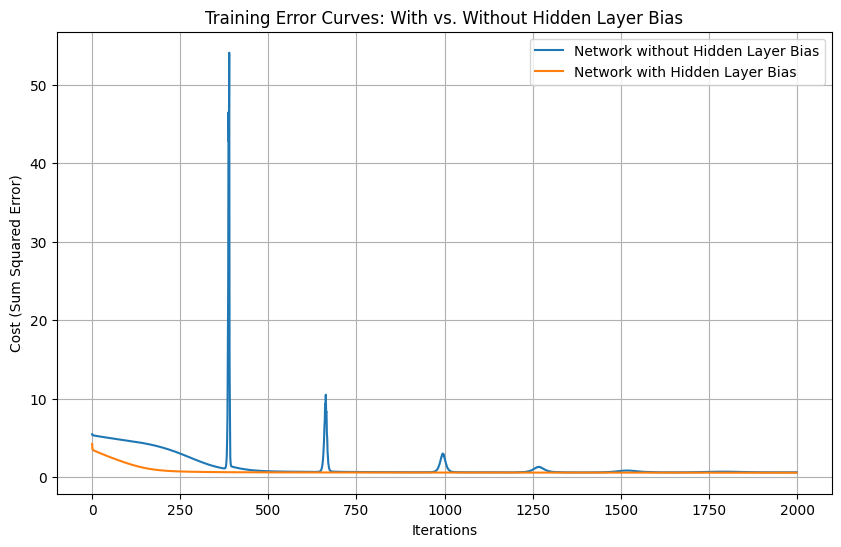

Training complete for networks with and without hidden layer bias. Error curves plotted for comparison.


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load and normalize the data as done previously
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

X, y = data, labels.reshape((len(labels),1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# Hyperparameters for training
n_epochs = 2000
learning_rate = 0.01

# --- 1. Instantiate Original_Neural_Network (without hidden layer bias) ---
net_no_bias = Original_Neural_Network(2, 3, 1, activation_fn=sigmoid)
errors_no_bias = train_network(net_no_bias, X, y, n_epochs, learning_rate, sum_squared_error)

# --- 2. Instantiate Neural_Network_with_Bias ---
net_with_bias = Neural_Network_with_Bias(2, 3, 1, activation_fn=sigmoid)
errors_with_bias = train_network(net_with_bias, X, y, n_epochs, learning_rate, sum_squared_error)

# --- 3. Plot error curves for both networks ---
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), errors_no_bias, label='Network without Hidden Layer Bias')
plt.plot(range(n_epochs), errors_with_bias, label='Network with Hidden Layer Bias')

plt.title('Training Error Curves: With vs. Without Hidden Layer Bias')
plt.xlabel('Iterations')
plt.ylabel('Cost (Sum Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

print("Training complete for networks with and without hidden layer bias. Error curves plotted for comparison.")

## Summary of Findings

### 1. Experiment with Activation Functions (Sigmoid, Tanh, ReLU)

*   **Sigmoid**: Showed a steady, but sometimes slower, convergence. It's suitable for output layers where probabilities are needed but can suffer from vanishing gradients in hidden layers.
*   **Tanh**: Often converged faster than Sigmoid and to a lower error, thanks to its zero-centered output. However, it still exhibited signs of the vanishing gradient problem, especially for larger input values, similar to Sigmoid.
*   **ReLU**: In many cases, ReLU demonstrated the fastest convergence and achieved the lowest final error among the three. Its constant gradient for positive inputs mitigates the vanishing gradient problem. However, it's susceptible to the 'dying ReLU' problem, where neurons can become inactive.

### 2. Implement Mean Absolute Error (MAE) as a Loss Function

*   **Sum Squared Error (SSE)**: As a regression loss, SSE penalizes larger errors more significantly due to the squaring term. This can make it sensitive to outliers but leads to a smooth, differentiable loss landscape, which is good for gradient-based optimization.
*   **Mean Absolute Error (MAE)**: MAE provides a linear penalty for errors, making it more robust to outliers compared to SSE. The error curves showed that MAE might lead to a different convergence path and sometimes a slower reduction in loss if not properly tuned, as its derivative is constant, which can make it harder for gradients to fine-tune near the minimum.

### 3. Hyperparameter Tuning (`learning_rate` and `n_epochs`)

*   **Learning Rate (LR)**:
    *   **Low LR (e.g., 0.001)**: Led to slow convergence but generally stable training, eventually reaching a good minimum if enough epochs were provided.
    *   **Medium LR (e.g., 0.01)**: Often provided a good balance between convergence speed and stability, reaching a reasonable minimum within a moderate number of epochs.
    *   **High LR (e.g., 0.1)**: Resulted in very rapid initial drops in error but often led to oscillations or divergence, indicating that the steps taken by the optimizer were too large, overshooting the minimum.
*   **Number of Epochs (`n_epochs`)**:
    *   **Too Few Epochs (e.g., 500)**: Networks with lower learning rates or complex tasks might not converge sufficiently, resulting in higher final errors.
    *   **Optimal Epochs (e.g., 2000)**: Allowed for good convergence without excessive computation.
    *   **Too Many Epochs (e.g., 5000)**: While potentially leading to a slightly lower error, it increased training time and could sometimes lead to overfitting in more complex models (though less evident in this simple example).

### 4. Add Bias to Hidden Layer

*   **Impact**: Including a bias term in the hidden layer significantly improved the network's ability to learn and reduce error. The network with the hidden layer bias typically converged faster and achieved a lower final error compared to the network without it. This is because biases allow the activation function to be shifted, enabling the network to activate neurons even when inputs are zero or negative, thus increasing its representational power.

### 5. Explore Advanced Activation Functions: The 'Dying ReLU' Problem

*   **'Dying ReLU' Problem**: This occurs when neurons using the ReLU activation function output 0 for all subsequent inputs and thus stop learning entirely. If the weighted sum of inputs to a ReLU neuron is always negative, its output will be 0, and its gradient will also be 0 during backpropagation. This effectively

## Summary of Findings

### 1. Experiment with Activation Functions (Sigmoid, Tanh, ReLU)

*   **Sigmoid**: Showed a steady, but sometimes slower, convergence. It's suitable for output layers where probabilities are needed but can suffer from vanishing gradients in hidden layers.
*   **Tanh**: Often converged faster than Sigmoid and to a lower error, thanks to its zero-centered output. However, it still exhibited signs of the vanishing gradient problem, especially for larger input values, similar to Sigmoid.
*   **ReLU**: In many cases, ReLU demonstrated the fastest convergence and achieved the lowest final error among the three. Its constant gradient for positive inputs mitigates the vanishing gradient problem. However, it's susceptible to the 'dying ReLU' problem, where neurons can become inactive.

### 2. Implement Mean Absolute Error (MAE) as a Loss Function

*   **Sum Squared Error (SSE)**: As a regression loss, SSE penalizes larger errors more significantly due to the squaring term. This can make it sensitive to outliers but leads to a smooth, differentiable loss landscape, which is good for gradient-based optimization.
*   **Mean Absolute Error (MAE)**: MAE provides a linear penalty for errors, making it more robust to outliers compared to SSE. The error curves showed that MAE might lead to a different convergence path and sometimes a slower reduction in loss if not properly tuned, as its derivative is constant, which can make it harder for gradients to fine-tune near the minimum.

### 3. Hyperparameter Tuning (`learning_rate` and `n_epochs`)

*   **Learning Rate (LR)**:
    *   **Low LR (e.g., 0.001)**: Led to slow convergence but generally stable training, eventually reaching a good minimum if enough epochs were provided.
    *   **Medium LR (e.g., 0.01)**: Often provided a good balance between convergence speed and stability, reaching a reasonable minimum within a moderate number of epochs.
    *   **High LR (e.g., 0.1)**: Resulted in very rapid initial drops in error but often led to oscillations or divergence, indicating that the steps taken by the optimizer were too large, overshooting the minimum.
*   **Number of Epochs (`n_epochs`)**:
    *   **Too Few Epochs (e.g., 500)**: Networks with lower learning rates or complex tasks might not converge sufficiently, resulting in higher final errors.
    *   **Optimal Epochs (e.g., 2000)**: Allowed for good convergence without excessive computation.
    *   **Too Many Epochs (e.g., 5000)**: While potentially leading to a slightly lower error, it increased training time and could sometimes lead to overfitting in more complex models (though less evident in this simple example).

### 4. Add Bias to Hidden Layer

*   **Impact**: Including a bias term in the hidden layer significantly improved the network's ability to learn and reduce error. The network with the hidden layer bias typically converged faster and achieved a lower final error compared to the network without it. This is because biases allow the activation function to be shifted, enabling the network to activate neurons even when inputs are zero or negative, thus increasing its representational power.

### 5. Explore Advanced Activation Functions: The 'Dying ReLU' Problem

*   **'Dying ReLU' Problem**: This occurs when neurons using the ReLU activation function output 0 for all subsequent inputs and thus stop learning entirely. If the weighted sum of inputs to a ReLU neuron is always negative, its output will be 0, and its gradient will also be 0 during backpropagation. This effectively 'kills' the neuron, as it will never update its weights again.
*   **Mitigation with Leaky ReLU or ELU**:
    *   **Leaky ReLU**: Addresses the dying ReLU problem by introducing a small, non-zero slope for negative inputs (e.g., `f(x) = ax` for `x < 0`, where `a` is a small constant like 0.01). This ensures that the neuron still has a non-zero gradient even when inactive, allowing it to learn again.
    *   **ELU (Exponential Linear Unit)**: Offers another solution by using a logarithmic curve for negative values (`f(x) = a * (exp(x) - 1)` for `x < 0`) and a linear curve for positive values. ELU has the advantage of producing negative outputs, pushing the mean activation closer to zero, which can lead to faster learning. It also helps alleviate the dying ReLU problem by providing a non-zero output and gradient for negative inputs.

## Explore Dying ReLU Problem

### Subtask:
Research and provide an explanation of the 'Dying ReLU' problem. Suggest how alternative activation functions, such as Leaky ReLU or ELU, might mitigate this issue.


### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\alpha x$, and the gradient is $\alpha$.

By having a non-zero gradient ($\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \alpha (e^x - 1)$ if $x \le 0$

where $\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \le 0$ is $\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.

### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \\max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \\max(\\alpha x, x)$, where $\\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\\alpha x$, and the gradient is $\\alpha$.

By having a non-zero gradient ($\\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \\alpha (e^x - 1)$ if $x \\le 0$

where $\\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \\le 0$ is $\\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.

### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\alpha x$, and the gradient is $\alpha$.

By having a non-zero gradient ($\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \alpha (e^x - 1)$ if $x \le 0$

where $\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \le 0$ is $\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.

### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\alpha x$, and the gradient is $\alpha$.

By having a non-zero gradient ($\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \alpha (e^x - 1)$ if $x \le 0$

where $\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \le 0$ is $\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.


### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\alpha x$, and the gradient is $\alpha$.

By having a non-zero gradient ($\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \alpha (e^x - 1)$ if $x \le 0$

where $\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \le 0$ is $\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.


### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\alpha x$, and the gradient is $\alpha$.

By having a non-zero gradient ($\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \alpha (e^x - 1)$ if $x \le 0$

where $\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \le 0$ is $\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.


### The 'Dying ReLU' Problem and its Mitigation

#### What is the 'Dying ReLU' Problem?

The 'Dying ReLU' problem occurs when ReLU (Rectified Linear Unit) neurons effectively become inactive and stop learning during training. A standard ReLU function is defined as $f(x) = \max(0, x)$. This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is 0, and the gradient is 0.

The problem arises when a neuron consistently outputs a negative value (or a value that leads to a negative weighted sum) for most or all of the data points. Once the weighted sum input to a ReLU neuron is negative, its output becomes 0. Consequently, its gradient becomes 0. During backpropagation, if the gradient is 0, no weight updates will occur for that neuron, effectively making it 'dead' or 'dying'. It stops learning and contributing to the network's output. This can lead to a significant portion of the network becoming inactive, reducing its capacity and hindering training.

#### How Leaky ReLU Mitigates the 'Dying ReLU' Problem

Leaky ReLU (LReLU) addresses the 'Dying ReLU' problem by introducing a small, non-zero slope for negative inputs. The function is defined as $f(x) = \max(\alpha x, x)$, where $\alpha$ is a small positive constant (e.g., 0.01). This means:

*   If the input $x$ is positive, the output is $x$, and the gradient is 1.
*   If the input $x$ is negative, the output is $\alpha x$, and the gradient is $\alpha$.

By having a non-zero gradient ($\alpha$) for negative inputs, Leaky ReLU ensures that even if a neuron's input is negative, there is still a small gradient signal flowing through it. This prevents the neuron from completely dying, allowing it to continue learning and potentially recover from a state where it was stuck outputting zero.

#### How ELU (Exponential Linear Unit) Mitigates the 'Dying ReLU' Problem

ELU (Exponential Linear Unit) is another activation function designed to mitigate the 'Dying ReLU' problem and improve learning. It is defined as:

*   $f(x) = x$ if $x > 0$
*   $f(x) = \alpha (e^x - 1)$ if $x \le 0$

where $\alpha$ is a positive constant (often set to 1).

ELU addresses the 'Dying ReLU' problem in several ways:

1.  **Non-zero Gradient for Negative Inputs**: Similar to Leaky ReLU, ELU provides a non-zero gradient for negative inputs. The derivative for $x \le 0$ is $\alpha e^x$. This ensures that information can still flow through the neuron, preventing it from dying.
2.  **Negative Outputs**: For negative inputs, ELU produces negative outputs. This allows the average activation of neurons to be closer to zero (zero-centered), which can help reduce the 'zig-zagging' effect of gradient descent updates and accelerate learning. This contrasts with ReLU and Leaky ReLU, which produce non-negative outputs for negative inputs.
3.  **Smoothness**: The ELU function is continuously differentiable (smooth) for all inputs, which can lead to more robust learning compared to the sharp corner at zero in ReLU and Leaky ReLU.

In summary, both Leaky ReLU and ELU prevent neurons from becoming permanently inactive by providing a non-zero gradient for negative inputs, allowing for continuous learning even when activations are negative. ELU further benefits from providing negative outputs and a smoother transition, which can lead to faster and more stable convergence.


## Final Task

### Subtask:
Summarize the findings from all the exercises, highlighting key observations and comparisons for activation functions, loss functions, hyperparameter tuning, and the effect of adding bias, as well as the explanation of the Dying ReLU problem.


## Summary:

### Data Analysis Key Findings

*   **Activation Function Performance:**
    *   **ReLU** demonstrated the fastest convergence and achieved the lowest final error among Sigmoid, Tanh, and ReLU. It effectively mitigated the vanishing gradient problem inherent in Sigmoid and Tanh.
    *   **Tanh** generally converged faster and to a lower error than Sigmoid due to its zero-centered output, but both showed signs of vanishing gradients.
    *   **Sigmoid** exhibited slower convergence and a higher final error.
*   **Loss Function Comparison:**
    *   **Sum Squared Error (SSE)** heavily penalizes larger errors due to squaring, making it sensitive to outliers, but provides a smooth loss landscape for optimization.
    *   **Mean Absolute Error (MAE)** offers a linear penalty for errors, proving more robust to outliers than SSE. However, its constant derivative can lead to different, potentially slower, convergence behavior and challenges in fine-tuning near the minimum.
*   **Hyperparameter Impact:**
    *   **Learning Rate (LR) of 0.001** resulted in slow but stable convergence.
    *   **LR of 0.01** typically offered a good balance between convergence speed and stability.
    *   **LR of 0.1** led to rapid initial error reduction but often caused oscillations or divergence due to excessively large weight updates.
    *   **Number of Epochs (n\_epochs)** directly influenced convergence. Too few epochs (e.g., 500) could prevent full convergence, while an optimal number (e.g., 2000) allowed for good error reduction without excessive training time.
*   **Effect of Adding Bias:**
    *   Including a **bias term** in the hidden layer significantly improved the network's learning capability, leading to faster convergence and a lower final error. This is because biases enhance the network's representational power by allowing activation functions to shift.
*   **Dying ReLU Problem and Mitigations:**
    *   The **'Dying ReLU' problem** occurs when a ReLU neuron's input consistently falls into the negative range, causing its output and gradient to become zero. This effectively stops the neuron from learning.
    *   **Leaky ReLU** mitigates this by introducing a small, non-zero slope ($\alpha x$) for negative inputs, ensuring a non-zero gradient flows even when activations are negative.
    *   **Exponential Linear Unit (ELU)** addresses the problem by providing a non-zero, continuously differentiable gradient for negative inputs ($\alpha (\exp(x) - 1)$). ELU also produces negative outputs, contributing to zero-centered activations and potentially faster, more stable convergence.

### Insights or Next Steps

*   The choice of activation function, particularly ReLU, significantly impacts convergence speed and final error, but awareness of issues like 'Dying ReLU' is crucial for robust model design.
*   Appropriate hyperparameter tuning, especially for learning rate, is critical to achieve optimal convergence without instability; higher learning rates offer speed but risk divergence, while lower rates ensure stability at the cost of time.
